<a href="https://colab.research.google.com/github/abharr/Abby-Neur-265/blob/main/Copy_of_04_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discretely-Sampled Signals (Spikes)

Unlike continuously-sampled signals, discretely-sampled signals are data points that are recorded at irregular intervals. The most common type of neural signal that falls into this category is the action potential. Recall that action potentials are *all-or-none* events - they either happen, or they don't. When recording action potentials (another word for action potentials is "spikes") in a behaving animal, we therefore just have to have some way of detecting their presence. 

##By the end of this notebook, you will be able to:

- Understand how action potentials are recorded *in vivo*
- Make a **raster plot** to display action potentials across time
- Calculate a neuron's **firing rate**, and plot firing rate as a function of time
- Correlate firing rate with behavior

One common way of recording spikes is with electrodes that are surgically implanted into the brain. One common type of electrode is called a *tetrode*. 



<img src = 'https://drive.google.com/uc?id=1z2d_p7dtEvCJy8D81-GWgZ480qlyJtMR'>


Each tetrode contains four "channels". Each channel maintains some physical distance from a neuron (in the picture above, the red neuron is closest to channel "1", and the blue neuron is closest to channel "4"). Due to the close proximity to channel 1, the action potential amplitude from the red neuron appears highest on that channel, and appears lower on the other three channels. The same is true for the blue neuron, with the exception that its action potential amplitude appears highest on channel 4 because that is the channel it is physically closest to. 

Question: If you made a scatter plot of amplitude on channel 1 vs. amplitude on channel 4, what would your plot look like?

In [1]:
# Import some modules

import numpy as np
import matplotlib.pyplot as plt

Another tool that researchers used is silicon probes (these specific probes are called "Neuropixels"). These probes have many (>200) channels, and they can record neurons across multiple brain areas at the same time.


<img src = 'https://drive.google.com/uc?id=1DsgY9gWs8B2dYzxamY0YR15mI-1F0-ti'>


In this notebook, we will be working with spiking data from neurons in the retina. Neurons in the retina typically respond to patterns of light displayed over small sections of the visual field. However, when retinal neurons are grown in culture and held under constant light and environmental conditions, they will still spontaneously fire action potentials. In a fully functioning retina, this spontaneous activity is sometimes described as background firing activity, which is modulated as a function of visual stimuli. It is useful to understand the properties of this background activity in order to determine in future experiments how these firing properties are affected by specific stimuli.

##Case Study Data

Our data represent the spiking activity in one of two states, with the room lights off (low ambient light levels) or with the room lights on (high ambient light levels). We would like to determine whether there is a difference in background firing between these two conditions, and whether one environment is more conducive to future experimental analyses. The spiking activity was recorded over a 30 s time period.



><b>Task:</b> Upload the <code>spikeshigh.csv</code> and <code>spikeslow.csv</code> files on our class GitHub repo as <code>numpy</code> arrays called <code>spikeshigh</code> and <code>spikeslow</code>, respectively.

In [4]:
# Upload .csv files!
url1 = 'https://raw.githubusercontent.com/hallockh/neur_265/main/spikeshigh.csv'
url2 = 'https://raw.githubusercontent.com/hallockh/neur_265/main/spikeslow.csv'
spikeshigh = np.loadtxt(url1, delimiter = ',')
spikeslow = np.loadtxt(url2, delimiter = ',')

Each value in our <code>spikeshigh</code> and <code>spikeslow</code> arrays correpsonds to a *timestamp* - a point in time during the recording session when an action potential occurred. Action potentials during both conditions were recorded from one neuron. 

></b>Task:</b> Write some code below to find the **firing rate** of this neuron in both conditions. To do so, you will need to know how long the recording session is - we already know that each recording session lasted for 30 seconds. You will also need to know how many spikes were emitted - this is equal to the length of your data.

In [8]:
# Find the firing rate for each condition!
t = 30
print(len(spikeshigh))
print(len(spikeslow))
frate_high = len(spikeshigh)/t
frate_low = len(spikeslow)/t
print('Firing rate in high light condition is',frate_high,'Hz')
print('Firing rate in low light condition is',frate_low,'Hz')

969
750
Firing rate in high light condition is 32.3 Hz
Firing rate in low light condition is 25.0 Hz


Question: Is this single number a good representation of the spike train data? What if the spiking changes dramatically throughout the recording?

These calculations allow us to compute a simple number representative of one aspect of the data: the firing rate over the entire duration of the recording. Do the two datasets exhibit a statistically significant change in the firing structure between conditions? Or, does the difference in firing rates lie within the range of expected fluctuations between any two trials of random spiking data? To answer these types of questions, we need to develop statistical methods that are appropriate for analyzing spike trains. Let’s look at the data more carefully and visualize the structure of the spiking in the low ambient light condition. It may be tempting to visualize the spike train by simply plotting the `spikeslow` variable. 

><b>Task:</b> Plot your <code>spikeslow</code> variable below. What is on the x-axis? Does the graph make sense?

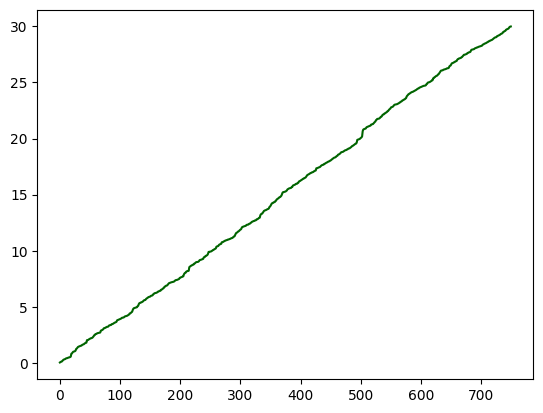

In [11]:
# Make a graph!
plt.plot(spikeslow, color='darkgreen')


Instead of the data representation above, we would like to plot the spike train data as a set of points in a single row with 𝑥
-coordinates that occur at the spike times. One way to produce such a plot is the following:

([], [])

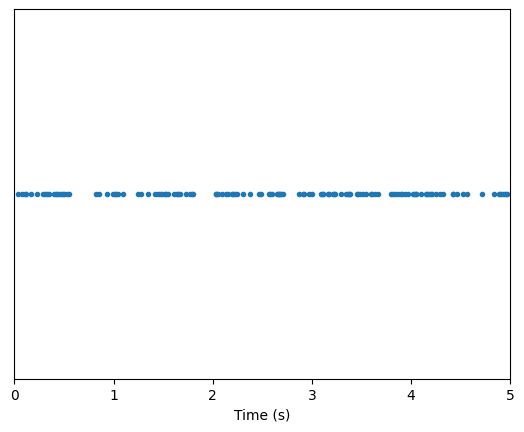

In [12]:
plt.plot(spikeslow, np.ones_like(spikeslow), '.')  # Plot spikes as a row,
plt.xlim([0, 5])                                # ... display times (0, 5) s
plt.xlabel('Time (s)')                          # ... label the x-axis
plt.yticks([])                                  # ... remove y-axis ticks

In the plot of the spike train above each spike time corresponds to a dot at a 𝑦
-axis value of 1. The value on the 𝑦
-axis is arbitrary. We could have chosen to use a 𝑦
-axis value of 2 or -100 or 412. What matters is the 𝑥
-axis, which indicates the time at which each spike occurs in the 5 s interval.

To compare the spiking in the low- and high-light conditions, we can plot both in the same figure:

([], [])

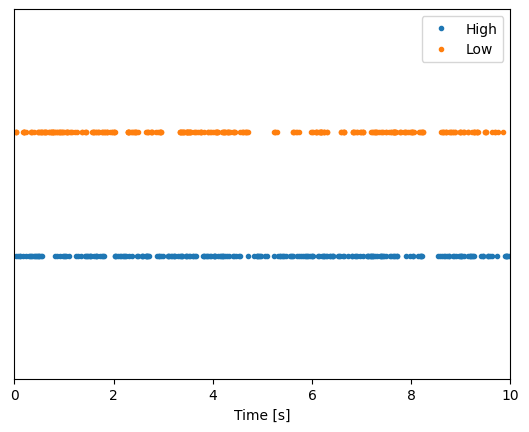

In [21]:
plt.plot(spikeslow, np.ones_like(spikeslow), '.')  # Plot the low-light condition spikes
plt.plot(spikeshigh, 2* np.ones_like(spikeshigh), '.')  # ... and the high-light condition spikes 
plt.xlim([0, 10])              # Display times 0 to 5 s on the x-axis
plt.ylim([0, 3])              # ... and set the y-axis limits
plt.xlabel('Time [s]')            # ... label the x-axis
plt.legend({'Low', 'High'})   # ... show a legend
plt.yticks([])                # ... remove y-axis ticks


Question: What's happening in the second line of code? What does <code>2 * np.ones_like</code> do? Replace the "2" in that line of code with a "3" and examine the output. What changes?

With the data visualized in this way, we’re now able to ask an interesting question: What structure do you notice in the two spike trains? At first glance, your answer might be “not much.” Spikes occur fairly regularly throughout the 5 s interval under both conditions. Perhaps a careful visual inspection suggests there are fewer spikes in the low-light than in the high-light condition. But the spike times themselves do not seem to be directly comparable between these conditions. Often, when we examine data from a stimulus response experiment, we expect to see regions where spiking activity increases or decreases as a function of a changing stimulus. In this case, the stimulus is the ambient light level, which remains constant over the entire experiment. How else can we analyze these data and identify differences in the spiking activity (if any) between the two conditions?

></b>Task:</b> Up to now, we’ve plotted a 5 s interval of data that begins at time 0 s. Through visual inspection, do you find similar conclusions for other 5 s intervals chosen from the data? Try to change the x-axis limits for the above raster plot to see other 5 s intervals.

##Examining Interspike Intervals

So far, we have examined the long-term structure of the spiking over multiple seconds. Let’s now focus on the short-term structure that occurs within a single second or less. Instead of plotting 5 s of spike train data, let’s plot an interval of 1 s:

([], [])

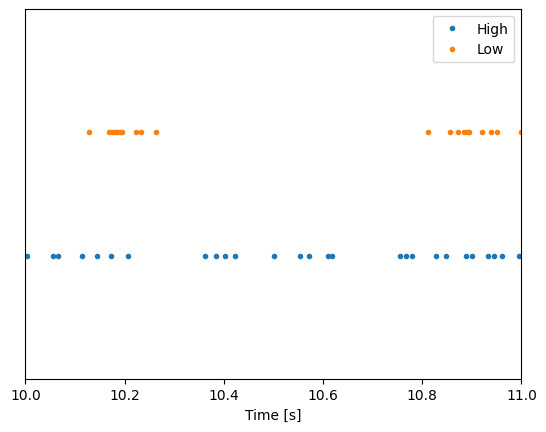

In [22]:
plt.plot(spikeslow, np.ones_like(spikeslow), '.')        # Plot the low-light condition spikes
plt.plot(spikeshigh, 2 * np.ones_like(spikeshigh), '.')  # ... and the high-light condition spikes 
plt.xlim([10, 11])              # Display times 10 to 11 s on the x-axis
plt.ylim([0, 3])                # ... and set the y-axis limits
plt.xlabel('Time [s]')              # ... label the x-axis
plt.legend({'Low', 'High'})     # ... show a legend
plt.yticks([])                  # ... remove y-axis ticks


Question: The code above was copied and pasted from the previous section with one minor update to change the time interval. What adjustments did we make to the code so that we see an interval of 1 s instead of 5 s?

Inspecting smaller time intervals, you might notice bursts of spikes that cluster near each other in time, interspersed with longer periods that contain less spiking. These patterns of bursts and quiescence look different between the low- and high-light stimuli. Visual inspection is an important tool, but we would like a quantitative result. How might we compare this fine temporal structure in the two conditions?

One approach to further characterizing the differences in spiking between the two conditions is to transform the data. One of the most useful transformations focuses on the waiting times between the spikes, or interspike intervals (ISIs), instead of the spike times themselves. We can compute the ISIs for the two conditions as follows:

In [23]:
ISIsLow = np.diff(spikeslow)    # Compute ISIs in the low-light condition
ISIsHigh = np.diff(spikeshigh)  # Compute ISIs in the high-light condition

Let’s focus on the first command, which defines the variable `ISIsLow`. Here, we use the function `np.diff()` with input `spikeslow`. Briefly, the `np.diff()` command computes the difference between adjacent elements of the input. In this case, the vector `spikeslow` represents the times at which spikes occur. Therefore, the difference between adjacent elements of `spikeslow` produces the time interval or waiting time between successive spikes. To further explore the concept of an ISI, let’s write the spike times as a vector,

𝑣=𝑡1,𝑡2,𝑡3,...,𝑇𝑁,

where 𝑡𝑖
 is the time of the 𝑖𝑡ℎ
 spike. The difference between the first two adjacent elements of 𝑣
 is

𝑡2−𝑡1.

By convention, the `np.diff()` function subtracts the first element from the second. In words, this difference represents the time of the second spike (𝑡2
) minus the time of the first spike (𝑡1
), or the first interspike interval in the data. The difference between the next two adjacent elements of 𝑣
 is

𝑡3−𝑡2,

which is the second ISI, and so on. In this way, `np.diff()` converts the spike times in the vector `spikeslow` into interspike intervals saved in the variable `ISIsLow`.

Question: Consider the variables `ISIsLow` and `ISIsHigh`. How do the sizes of these variables compare to the sizes of the corresponding spike trains `spikeslow` and `spikeshigh`, respectively? 

In [25]:
#find size of ISIsLow and ISIsHigh
print(ISIsLow.size)
print(ISIsHigh.size)

749
968


The variables `ISIsLow` and `ISIsHigh` are vectors, and we can visualize these vectors using the same tools we’ve applied to visualize vectors in other scenarios. For example, we may simply plot these vectors:

><b>Task:</b> Plot your <code>ISIsLow</code> and <code>ISIsHigh</code> vectors below in two separate subplots.

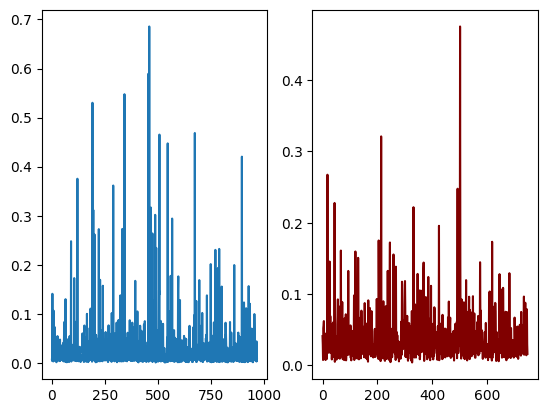

In [32]:
# Plottin' interspike intervals!
fig,ax = plt.subplots(1,2)
ax[0].plot(ISIsHigh)
ax[1].plot(ISIsLow, color='maroon')

Question: What similarities and differences do you notice between the ISI distributions for the two conditions?

Plots of the ISI vectors provide some information about the data (e.g., the approximate range of the ISI values), but there’s more insight to be gained. To that end, let’s now implement another approach to visualizing these types of data: the histogram. The idea of a histogram is to count the number of occurrences of each value in the data. In this case, we count the number of times we observe an ISI value in different bins of time. Let’s define the time bins for the histogram. Inspection of the ISI data for the low-light condition reveals values that range from near 0 s to over 0.4 s. Therefore, we choose the following time bins:

Bin 0 [0.00 0.01]

Bin 1 [0.01 0.02]

Bin 2 [0.02 0.03]

Bin 3 [0.03 0.04]

Bin 4 [0.04 0.05]

Bin 5 [0.05 0.06]

Bin 6 [0.06 0.07]

…

Bin N [0.49 0.50]

The bins begin at time 0 s and end at time 0.5 s, with a bin size of 0.01 s. The purpose of the histogram is to count the number of times the data values fall into each bin. Notice that we’ve chosen the range of bins to extend beyond the observed range of data `ISIsLow`; that’s fine, and we expect to count no values in the bins near 0.5 s. To further explore this counting process, let’s examine the first eight values of the data `ISIsLow`:

In [33]:
ISIsLow[:8]

array([0.04098354, 0.02902169, 0.00746714, 0.05205904, 0.05553601,
       0.06204051, 0.02267623, 0.02132764])

><b>Task:</b> On the board, write the first 10 bins down. Next, assign each of the first eight ISI values from <code>ISIsLow</code> to a bin. How many values are in each bin? Do the same thing for <code>ISIsHigh</code>. When you sum the counts across bins, what do you get? Does this number make sense?

Of course, we’re free to choose any interval of bins for the histogram. In the preceding examples, we chose a bin size of 0.01 s = 10 ms. Based on our understanding of a neuron, we might instead choose to examine a smaller bin size, 0.001 s = 1 ms. Let’s do so now, and examine the histogram of all ISIs for the low-light condition. Of course, with enough patience, we could examine by hand each ISI value from the low-light condition and place each value in the correct 1 ms bin. However, this process would be time consuming and extremely error prone. Instead, the process of binning the ISI data is better done in Python. To create a histogram of all the ISI data in the low-light condition is straightforward:

Text(0.5, 1.0, 'Low-light')

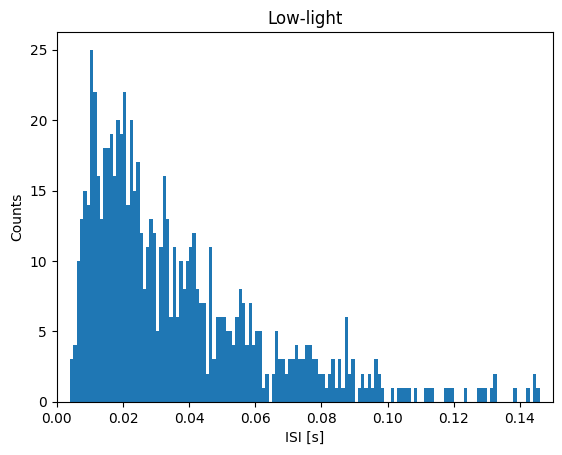

In [34]:
bins = np.arange(0, .5, 1e-3)  # Define the bins for the histogram
plt.hist(ISIsLow, bins)        # Plot the histogram of the ISI data
plt.xlim([0, 0.15])            # ... focus on ISIs from 0 to 150 ms
plt.xlabel('ISI [s]')              # ... label the x-axis
plt.ylabel('Counts')               # ... and the y-axis
plt.title('Low-light')             # ... give the plot a title

In the first line of this code segment, we define the bins. These bins start at time 0 s and end at time 0.499 s, and the size of each bin is 0.001 s. We then call the function `plt.hist()` with two inputs: the first input is the variable we’d like to examine (here, `ISIsLow`, the ISIs in the low-light condition), and the second input is the bins. The function `plt.hist()` computes the histogram and displays the result. By setting the 𝑥
-axis limit with `plt.xlim()`, we’ve chosen to examine the ISI values from 0 ms to 150 ms. We’ve also labeled the axes in the resulting figure. Notice that the 𝑥
-axis indicates the binned ISI intervals, while the 𝑦
-axis indicates the number of counts in each bin.

><b>Task:</b> Repeat this procedure to create a histogram of the ISI data in the high-light condition. Use the same bins we applied in the low-light condition (i.e., a bin size of 1 ms, extending from 0 s to 0.5 s). What do you find?

Text(0.5, 1.0, 'High-light')

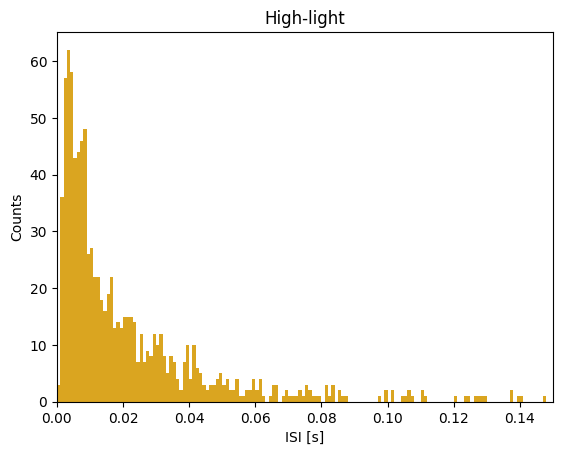

In [38]:
# Makin' histograms!
bins = np.arange(0, .5, 1e-3)  # Define the bins for the histogram
plt.hist(ISIsHigh, bins, color='goldenrod')        # Plot the histogram of the ISI data
plt.xlim([0, 0.15])            # ... focus on ISIs from 0 to 150 ms
plt.xlabel('ISI [s]')              # ... label the x-axis
plt.ylabel('Counts')               # ... and the y-axis
plt.title('High-light')             # ... give the plot a title

Let’s now consider the two ISI histograms representing the spiking activity from the two conditions. We note that both histograms show no ISI values below 0 ms. This is to be expected; the intervals between spikes cannot be negative. Both histograms also show broad peaks at 5–20 ms, indicating that a large number of short ISIs appear in the spike trains. In addition, both histograms possess long tails (i.e., counts of ISIs at larger bins, beyond 50 ms). A reasonable conclusion is that both neurons exhibit bursting activity, intervals of rapid spiking separated by periods of quiescence. However, a prominent difference exists between the ISI histograms in the two conditions. In the high-light condition, the proportion of small ISIs is much larger. The visualizations of the ISI histograms provide additional evidence of the similarities and differences in the spiking activity from the two conditions. We continue to investigate these two datasets—and build our scientific conclusions—in the next sections.

Question: We claim that the neuron exhibits bursting activity in both histograms. But clearly the two ISI histograms are different. How does the bursting activity differ in the low- and high-light conditions? Hint: Consider the impact of the large proportion of small ISIs in the high-light condition.

##Examining Binned Spike Increments

Another common approach to analyzing spiking data is to discretize time into bins of fixed width and count the number of events that occur in each time bin. The sequence of spike counts across all the bins is sometimes called the increment process for the spike train. When the time bins are sufficiently small, say, 1 ms for typical spike train data, the resulting increment process is just a sequence of zeros and ones. In this case, the time bins are so small that the probability of more than one spike occurring in each bin is zero or negligibly small. Each tiny time bin then contains a spike (and we assign that bin a value of 1) or does not (and we assign that bin a value of 0). In this section, we compute the increment process with multiple bin sizes in order to characterize the amount of variability in the spiking data and to examine temporal dependencies between spikes.

Let’s bin the spike train data of the low-light condition into time bins of size 50 ms. To do so, we make use of the function `np.histogram()`:

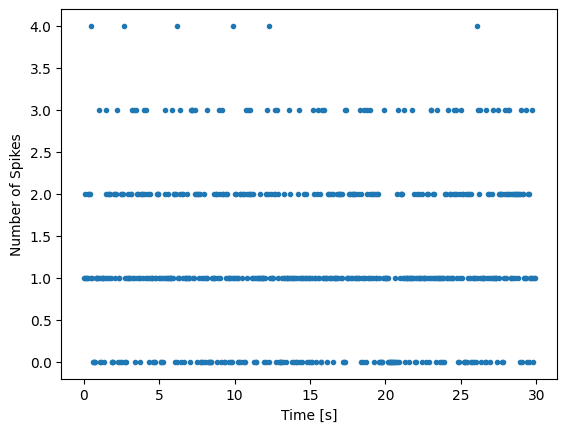

In [42]:
time_bins = np.arange(0, 30, 0.05)                       # Define the time bins
IncrementsLow50, _ = np.histogram(spikeslow, time_bins)  # ... and compute a histogram of the data
plt.plot(time_bins[:-1], IncrementsLow50, '.')               # Plot the resulting counts over time
plt.xlabel('Time [s]')                                       # ... with axes labeled
plt.ylabel('Number of Spikes')
IncrementsHigh50, _ = np.histogram(spikeshigh, time_bins)

Notice that, in this case, we use the function `np.histogram()` in a new way. Instead of simply generating a plot, we call the function with the output variable `IncrementsLow50`. This variable `IncrementsLow50` is a vector containing the number of counts (i.e., the number of spikes) in each 50 ms increment. The time bins (`time_bins`, the second input to the function `np.histogram`) is a vector containing the bin locations in time. In this case, the time bins start at time 0 s and end at time 30 s, with 0.05 s between bins. The variable name `IncrementsLow50` is quite descriptive. It reminds us that the variable represents the increments process in the low-light condition with a time bin of 50 ms.

Question: What can you say about the spike train data based on the increment process that we just plotted? Approximately how often do you observe a 50 ms increment with zero spikes? With four spikes?

One question that arises quite often is how variable these binned counts are. To illustrate this variability, let’s consider two scenarios. In the first, consider a neuron that fires perfectly regularly, like a metronome. In this case, we expect the number of spikes in each time bin to be nearly identical. On the other hand, consider the scenario of a neuron that fires in irregular bursts. In this case, we expect much more variability in the number of spikes in each time bin, depending on whether a time bin contained a burst of spikes or a quiet period. To characterize this variability, a standard measure to compute is the sample Fano factor (FF). It’s easy to define the Fano factor: FF is the sample variance of the increment process divided by the sample mean of the increment process. The implementation of FF in Python is also relatively simple:

In [46]:
FF50Low = IncrementsLow50.var() / IncrementsLow50.mean()
print('FF50Low =', FF50Low)
FF50High = IncrementsHigh50.var() / IncrementsHigh50.mean()
print('FF50High =', FF50High)

FF50Low = 0.7164927285225824
FF50High = 1.7786165348043843


How do we interpret this value? To answer that question, we need to introduce the concept of a Poisson process. A Poisson process is a model for a spiking process for which each spike occurrence is independent of every other spike occurrence. In other words, the probability of a neuron spiking at any instant does not depend on when the neuron fired (or did not fire) previously. A useful way to conceptualize this process is as a coin flip. For example, consider the following outcome of 20 coin flips:

HTHTTTHTTTTTHHHHHHTH

where H indicates heads, and T indicates tails.

Based on your intuitive knowledge of a coin flip, does the result of a chosen coin flip depend on any other coin flip?

The Poisson process is rarely an accurate model for spike train data. Our biological knowledge reveals that the occurrence of a spike does depend on the occurrence of previous spikes (e.g., because of the refractory period of a neuron, we do not expect a spike to occur immediately after another spike). However, the Poisson process has many nice theoretical properties that make it a good model against which to compare the data. For example, for any Poisson process, the number of spikes in any time interval has a Poisson probability distribution for which the theoretical variance and mean are equal

The theoretical Fano factor for a Poisson process is exactly equal to 1.

When measuring the variability of the increments of a spike train, we typically compare it to the variability of a Poisson process. If we compute a Fano factor well below the value 1 for a particular set of increments, this suggests that the spiking is more regular than a Poisson process for the time scale at which the increments were binned. In this case, spiking activity in the past is influencing the neuron to spike in a more predictable manner in subsequent bins. If we compute a Fano factor well above the value 1, this suggests that the spiking is more variable than a Poisson process for the time scale at which the increments were binned.

For the 50 ms binned spikes in the low-light condition, we obtained a sample Fano factor value of 0.72, well below 1. We might therefore conclude that the spiking data in the low-light condition are more regular (i.e., more like a metronome) than we expect for a Poisson process.

><b>Task:</b> Compute the Fano factor for the high-light condition. What can you conclude about the regularity of spiking in this condition?

In [ ]:
# Compute your Fano factor

##Computing Autocorrelations for the Increments

Another way to characterize the history dependence structure of a spike train is with the autocorrelation function of the increments. A correlation coefficient describes the degree of linear dependence between any two variables. The value of the correlation ranges from -1 to 1. A correlation value of -1 indicates a perfect linear relation between the two variables with a negative slope. A value of 0 indicates no linear relation between the two variables. And a value of 1 indicates a perfect linear relation between the two variables with a positive slope. Any other value indicates that one variable can be predicted using a linear function of the other, but that prediction will be imperfect; the closer the value is to ±1, the better the prediction will be. The sign of the coefficient indicates the slope of the linear relation. The following figure shows scatterplots for a variety of possible relations between two variables, and the values of the correlation coefficients.

<img src = 'https://drive.google.com/uc?id=1mVBiq8_cQ-QZyHl35NyY1xp631fze0xN'>

Let’s compute the autocorrelation for increment processes deduced from the spike train data in the low-light condition. We compute the autocorrelation of the 50 ms increment process for lags ranging from 0 to 200 ms. We need only three lags to cover this range; lag 1 covers 50–100 ms, lag 2 covers 100–150 ms, and lag 3 covers 150–200 ms. We can define a function to compute the autocorrelation using the function `correlate()` from the `NumPy` module:

In [ ]:
def autocorr(x, lags):
    xcorr = np.correlate(x - x.mean(), x - x.mean(), 'full')  # Compute the autocorrelation
    xcorr = xcorr[xcorr.size//2:] / xcorr.max()               # Convert to correlation coefficients
    return xcorr[:lags+1]                                     # Return only requested lags
    
autocorr(IncrementsLow50, 3)

Our new function `autocorr()` takes two inputs. The first input is the data for which we want to compute the autocorrelation, in this case, the increment process for the low-light condition with 50 ms time bins. The second input is the number of lags to compute. Within the function, we scale the raw autocorrelation so that we instead see correlation coefficients, which range from -1 to 1. Notice that we subtract from `IncrementsLow50` the mean of this variable before computing the autocorrelation. This command outputs a vector with four numerical values corresponding to the autocorrelation at lag indices 0 through 3. 

As expected, the autocorrelation at zero lag is exactly equal to 1; the data matches itself at lag 0. At lag 1, corresponding to 50–100 ms, the autocorrelation value is 0.04. This positive correlation value indicates that when the number of spikes in one bin is higher than expected, the number of spikes in the next bin tends to be higher than expected. Similarly, when the number of spikes in one bin is lower than expected, the number of spikes in the next bin will also tend to be lower than expected. This effect is small, however, since the autocorrelation is near zero. At lag 2, corresponding to 100–150 ms, the autocorrelation value of 0.07 is again small and positive. At lag 3, corresponding to 150–200 ms, the autocorrelation value remains small and positive at a value of 0.04.

If we are particularly interested in the fine-scale temporal dependence structure of the spikes, we would do better to compute the autocorrelation function for more finely binned intervals. To that end, let’s repeat the autocorrelation analysis for an increment process that uses 1 ms bins. We first compute a new increment process and then apply the `autocorr()` function to this process.

In [ ]:
time_bins = np.arange(0, 30, 0.001)                    # Define the time bins
IncrementsLow1, _ = np.histogram(spikeslow, time_bins) # ... compute the histogram to create increment process
ACFLow = autocorr(IncrementsLow1, 100)                 # ... and the autocorrelation

><b>Task:</b> Find the size of <code>ACFLow</code>. How does this correspond to the lags?

In [ ]:
# Your code here!

In order to examie history dependence going back 100 ms, we need 100 lags (because each lag index corresponds to 1 ms). There are now too many values to examine them printed one by one on the screen, so instead we construct a plot of the autocorrelation function with lag on the 𝑥
-axis and correlation on the 𝑦
-axis. Let’s also include in this figure two approximate significance lines at ±2/𝑁‾‾√
.

In [ ]:
plt.plot(ACFLow, '.')                  # Plot autocorrelation vs lags,
N1 = len(IncrementsLow1)           # ... compute the sample size
sig = 2 / np.sqrt(N1)              # ... and the significance level
plt.plot([0, 100], [sig, sig], 'r:')   # ... and plot the upper and lower significance lines
plt.plot([0, 100], [-sig, -sig], 'r:')
plt.xlim([0, 100])                 # ... set x-limits
plt.ylim([-.1, .1])                # ... and y-limits
plt.xlabel('Time [ms]')                # ... with axes labeled
plt.ylabel('Autocorrelation')


We see that the two approximate significance lines at ±2/𝑁‾‾√
 suggest significant negative correlation structure is present up to about 6
 ms. This reflects the refractory period of the neuron: if you observed a spike in the previous 6 ms, you are less likely to observe a spike in the next few milliseconds. Beyond this point, the values of the autocorrelation mostly remain between the two significance bounds.

><b>Task:</b> Compute the lagged autocorrelations for your high-light condition, and plot the results. Are there differences between the two conditions?

In [ ]:
# Make a plot for your high-light condition!

##Firing Rate Over Time

We originally calculated firing rates over the entire 30 s recording period. It might be useful to see if firing rate fluctuates across time. To do this, we'll need to define time bins, and then find spikes that occur within each bin. Once we have the number of spikes in each bin, we can calculate the firing rate for that bin by dividing the number of spikes by the bin size (recall that the unit for firing rate, "Hz", is a measure of the number of spikes that occur per second). 

In [50]:
binsize = 1                                                                   # Let's start with 1-second bins
fr_bins = np.arange(0,30,binsize)                                             # Make time bins (in 1 second increments) from 0 to 30 s
fr_low = np.zeros(len(fr_bins)-1)                                             # Initialize our firing rate array                                 
for i in range(len(fr_bins)-1):                                               # Loop through each bin
  spk_index = (spikeslow > fr_bins[i]) & (spikeslow < fr_bins[i+1])           # Find timestamp values falling within each bin
  true_values = spikeslow[spk_index]                                          # Our index is a boolean, so we need to isolate "True" values
  fr_low[i] = (len(true_values))/binsize                                      # Divide number of spikes (timestamps) by our bin size to get firing rate
fr_bins = np.arange(0,30,binsize)                                             # Make time bins (in 1 second increments) from 0 to 30 s
fr_high = np.zeros(len(fr_bins)-1)                                             # Initialize our firing rate array                                 
for i in range(len(fr_bins)-1):                                               # Loop through each bin
  spk_index = (spikeshigh > fr_bins[i]) & (spikeshigh < fr_bins[i+1])           # Find timestamp values falling within each bin
  true_values = spikeshigh[spk_index]                                          # Our index is a boolean, so we need to isolate "True" values
  fr_high[i] = (len(true_values))/binsize   


Now, let's plot the firing rate across time for the low-light condition:

Text(0, 0.5, 'Firing Rate [Hz]')

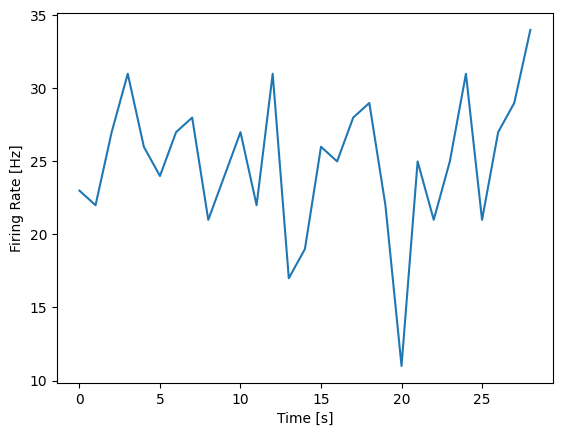

In [48]:
plt.plot(fr_bins[:-1], fr_low)
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [Hz]')

><b>Task:</b> Create a plot that has firing rates for both low-light (in <font color = 'blue'>blue</font>) and high-light (in <font color = 'red'>red</font>) conditions in one plot. Label your axes. What are the differences between the two?

Text(0, 0.5, 'Firing Rate [Hz]')

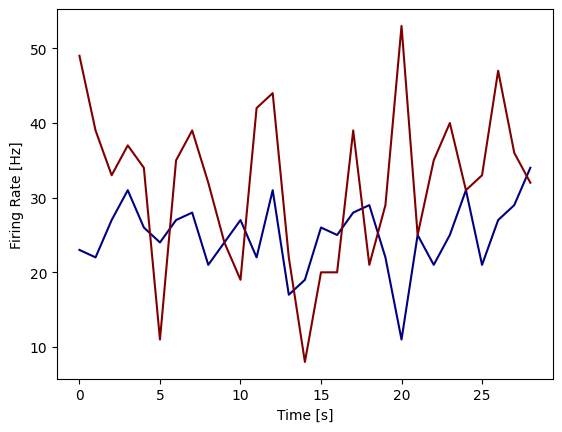

In [55]:
#create plot of firing rates over time for Low and High light conditions
plt.plot(fr_bins[:-1], fr_low, color='navy')
plt.plot(fr_bins[:-1], fr_high, color='maroon')
plt.xlabel('Time [s]')
plt.ylabel('Firing Rate [Hz]')

><b>Task:</b> Re-create the above plot, but with a <code>binsize</code> value equal to 5 seconds. What changed? Do it again, but with a <code>binsize</code> equal to 250 milliseconds. How does it change now?